In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import os, math

In [177]:
def plot(algos, regrets, cumsum=False, filename=None, figshow=True, legendloc='bottom left'):
    assert len(algos) == len(regrets)
    num_algos = len(algos)
    
    # Get color range
    cmap = plt.cm.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    cinv = cmap.N / (1. * num_algos) 
    
    
    if cumsum:
        regrets_ = []
        for r in regrets:
            regrets_.append(r.cumsum(axis=1))
        regrets = regrets_
    
    # Compute mu and std 
    mus = []
    stds = []
    for r in regrets:
        mu = np.mean(r,axis=0)
        std = np.std(r,axis=0) / math.sqrt(r.shape[0])
        mus.append(mu)
        stds.append(std) 
        
    # Plot 
    T = regrets[0].shape[1]
    fig = plt.figure(figsize=(5,4))
    dom = np.arange(T)

    for i in range(num_algos):
        color = colors[int( (i + 0.5) * cinv)] 
        plt.plot(dom, mus[i], label=algos[i], color=color) 
        plt.fill_between(dom, mus[i] + 1.96 * stds[i],\
                         mus[i] - 1.96 * stds[i], alpha=0.2, color=color)

    plt.xlim([0,T])
    plt.rc('grid', linestyle='--', color='black', alpha=0.2)
    plt.grid('on')
    
    if legendloc:
        plt.legend(loc = legendloc, prop={'size': 11}) 
    else:
        plt.legend(prop={'size':11})


    dom = np.arange(0, T, 200)
    plt.xticks(dom, dom*10)
    plt.xlabel('Number of samples',fontsize=12)
    plt.ylabel('Sub-optimality',fontsize=12)

    if filename:
        if not os.path.exists('fig'):
            os.makedirs('fig')
        fig.savefig(os.path.join('fig', filename), dpi=500, bbox_inches='tight')
    
    if not figshow:
        plt.close(fig)
        plt.clf()

In [178]:
def plot_synthetic_experiment(name, trainconfig, beta, rbf_sigma, figshow=False, legendloc=None, save=True):
    res_dir = os.path.join('results', name)
    approx_neural = 'approx-neural-gridsearch_epochs={}_m=20_layern=True_buffer={}_bs={}_lr=0.001_beta={}_lambda=0.0001_lambda0=0.1.npz'.format(trainconfig[0],trainconfig[1],trainconfig[2],beta)
    neural_greedy = 'neural-greedy-gridsearch_epochs={}_m=20_layern=True_buffer={}_bs={}_lr=0.001_lambda=0.0001.npz'.format(trainconfig[0],trainconfig[1],trainconfig[2])
    baseline = 'baseline_epochs=100_m=20_layern=True_beta=0.1_lambda0=0.1_rbf-sigma=1.0_maxnum=1000.npz'
    kern = 'kern-gridsearch_beta=0.1_rbf-sigma={}_maxnum=1000.npz'.format(rbf_sigma)

    neuralcb = np.load(os.path.join(res_dir,approx_neural))['arr_0']
    neuralgreedy = np.load(os.path.join(res_dir,neural_greedy))['arr_0']
    bl = np.load(os.path.join(res_dir,baseline))['arr_0']
    kernlcb = np.load(os.path.join(res_dir,kern))['arr_0']

    # Read data 
    arrs = (neuralcb, neuralgreedy, bl, kernlcb)
    algos = ['NeuraLCB', 'NeuralGreedy', 'LinLCB', 'NeuralLinLCB', 'NeuralLinGreedy', 'KernLCB']
    regrets = [] 
    i = 0
    for a in arrs:
        for i in range(1,a.shape[1]):
            regrets.append(a[:,i,:])

    # Plot
    filename =  '{}_cf={}{}{}_beta={}_rbfsigma={}.pdf'.format(name.split('_')[0],trainconfig[0],trainconfig[1],trainconfig[2],beta,rbf_sigma)
    print(filename)
    plot(algos, regrets, cumsum=False, filename=filename if save else None, figshow=figshow, legendloc=legendloc)

In [166]:
data_types = ['quadratic', 'quadratic2', 'cosine']
betas = [0.01,0.05,0.1,1.0,5.0]
trconfigs = [[1,1,1], [100,-1,50]]
rbf_sigmas = [0.1,1.0,10.0]
postfix = 'd=20_a=30_pi=eps-greedy0.1_std=0.1'
for data_type in data_types:
    for trconfig in trconfigs:
        for beta in betas:
            for rbf_sigma in rbf_sigmas:
                name = '{}_{}'.format(data_type, postfix) 
                plot_synthetic_experiment(name, trconfig, beta, rbf_sigma)

quadratic_cf=111_beta=0.01_rbfsigma=0.1.pdf
quadratic_cf=111_beta=0.01_rbfsigma=1.0.pdf
quadratic_cf=111_beta=0.01_rbfsigma=10.0.pdf
quadratic_cf=111_beta=0.05_rbfsigma=0.1.pdf
quadratic_cf=111_beta=0.05_rbfsigma=1.0.pdf
quadratic_cf=111_beta=0.05_rbfsigma=10.0.pdf
quadratic_cf=111_beta=0.1_rbfsigma=0.1.pdf
quadratic_cf=111_beta=0.1_rbfsigma=1.0.pdf
quadratic_cf=111_beta=0.1_rbfsigma=10.0.pdf
quadratic_cf=111_beta=1.0_rbfsigma=0.1.pdf
quadratic_cf=111_beta=1.0_rbfsigma=1.0.pdf
quadratic_cf=111_beta=1.0_rbfsigma=10.0.pdf
quadratic_cf=111_beta=5.0_rbfsigma=0.1.pdf
quadratic_cf=111_beta=5.0_rbfsigma=1.0.pdf
quadratic_cf=111_beta=5.0_rbfsigma=10.0.pdf
quadratic_cf=100-150_beta=0.01_rbfsigma=0.1.pdf
quadratic_cf=100-150_beta=0.01_rbfsigma=1.0.pdf
quadratic_cf=100-150_beta=0.01_rbfsigma=10.0.pdf
quadratic_cf=100-150_beta=0.05_rbfsigma=0.1.pdf
quadratic_cf=100-150_beta=0.05_rbfsigma=1.0.pdf
quadratic_cf=100-150_beta=0.05_rbfsigma=10.0.pdf
quadratic_cf=100-150_beta=0.1_rbfsigma=0.1.pdf
quadrat

<Figure size 432x288 with 0 Axes>

quadratic_cf=100-150_beta=0.05_rbfsigma=1.0.pdf
quadratic2_cf=100-150_beta=1.0_rbfsigma=1.0.pdf
cosine_cf=100-150_beta=0.05_rbfsigma=0.1.pdf


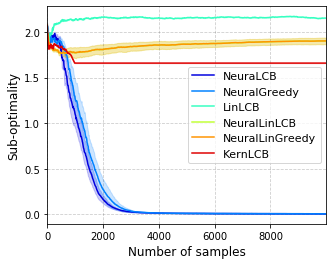

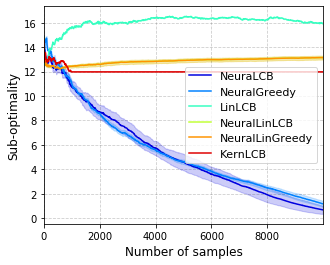

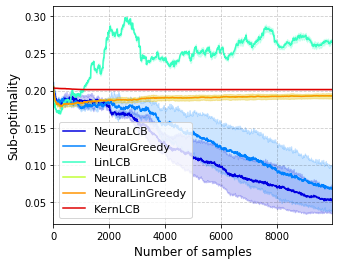

In [181]:
# best 
conf = {
    'quadratic': [[100,-1,50], 0.05, 1.0],
    'quadratic2': [[100,-1,50], 1.0, 1.0],
    'cosine': [[100,-1,50], 0.05, 0.1] 
}
for data_type in data_types:
    trconfig = conf[data_type][0]
    beta = conf[data_type][1]
    rbf_sigma = conf[data_type][2]
    name = '{}_{}'.format(data_type, postfix) 
    plot_synthetic_experiment(name, trconfig, beta, rbf_sigma, figshow=True, save=True)